# **TUGAS VISUALISASI DATA**
# **ANALISIS DATA PENJUALAN NIKE U.S. (2020-2021)**

---

**Identitas Mahasiswa**
* **Nama:**
  1. Muhammad Faza Abiyyu - 2211102010
  2. Muhammad Rizqi - 2211102016
  3. Evan Rafif Pradana - 2211102017
  4. Muhammad Marganda Zuhdi - 2211102042
  5. Revan Kurniawan - 2211102167
* **Mata Kuliah:** Visualisasi Data

---

## **I. LATAR BELAKANG**

Dalam dunia bisnis ritel modern, data penjualan merupakan aset krusial yang dapat memberikan wawasan mendalam mengenai perilaku konsumen dan kinerja produk. Nike, sebagai salah satu pemimpin pasar global dalam industri pakaian dan alas kaki olahraga, menghasilkan data transaksi yang masif setiap harinya.

Tugas ini bertujuan untuk menerapkan teknik visualisasi data dalam menganalisis dataset penjualan produk Nike di Amerika Serikat selama periode tahun 2020 hingga 2021. Melalui pendekatan visual, kita dapat mengubah data mentah menjadi informasi yang lebih mudah dipahami untuk melihat tren, pola, dan anomali yang terjadi selama periode tersebut. Analisis ini penting untuk memahami bagaimana faktor waktu (bulan/tahun), jenis produk, lokasi geografis, dan harga dapat mempengaruhi total penjualan.

## **II. RUMUSAN MASALAH**

Berdasarkan dataset yang tersedia, laporan ini akan fokus menjawab empat pertanyaan utama melalui visualisasi data:

1.  **Bagaimana tren penjualan bulanan Nike pada tahun 2020 dibandingkan dengan tahun 2021?** (Untuk melihat performa *year-on-year*).
2.  **Produk apa saja yang termasuk dalam 5 besar (Top 5) kontributor penjualan tertinggi?** (Untuk mengidentifikasi produk unggulan).
3.  **Bagaimana proporsi kontribusi penjualan dari berbagai wilayah (region) di Amerika Serikat?** (Untuk melihat dominasi pasar geografis).
4.  **Apakah terdapat korelasi antara harga per unit produk dengan jumlah unit yang terjual?** (Untuk memahami sensitivitas harga).

## **III. METODOLOGI**

### **A. Persiapan Data (Data Preparation)**
Langkah pertama adalah memuat *library* yang diperlukan untuk manipulasi data (Pandas, NumPy) dan visualisasi data (Matplotlib, Seaborn). Selanjutnya, data akan dimuat dan dibersihkan agar siap untuk dianalisis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Mengatur gaya visualisasi agar terlihat rapi
sns.set_theme(style="whitegrid")

# import library untuk ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# input
filename = 'https://raw.githubusercontent.com/ham407/Analisis-Penjualan-Produk-Nike-U.S.-Tahun-2020---2021/main/Nike%20Dataset.csv'

# read data
df = pd.read_csv(filename)

# Menghitung Total Sales
df['Total Sales'] = df['Price per Unit'] * df['Units Sold']
# [SELESAI BLOK DATA DUMMY]

# --- PRE-PROCESSING ---
# Memastikan kolom tanggal bertipe datetime agar bisa diekstrak bulan dan tahunnya
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], dayfirst=True)
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month

# Menampilkan 5 baris pertama data untuk pemeriksaan
print("Contoh 5 data teratas:")
df.head()

Contoh 5 data teratas:


,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold,Year,Month
0,2020-01-01,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120,2020,1
1,2020-01-02,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100,2020,1
2,2020-01-03,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100,2020,1
3,2020-01-04,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85,2020,1
4,2020-01-05,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90,2020,1


## **IV. HASIL VISUALISASI DAN PEMBAHASAN**

### **1. Analisis Tren Penjualan Bulanan (2020 vs 2021)**
Visualisasi pertama menggunakan *Line Chart* untuk membandingkan kinerja penjualan bulanan antar tahun. Grafik ini efektif untuk melihat fluktuasi musiman.

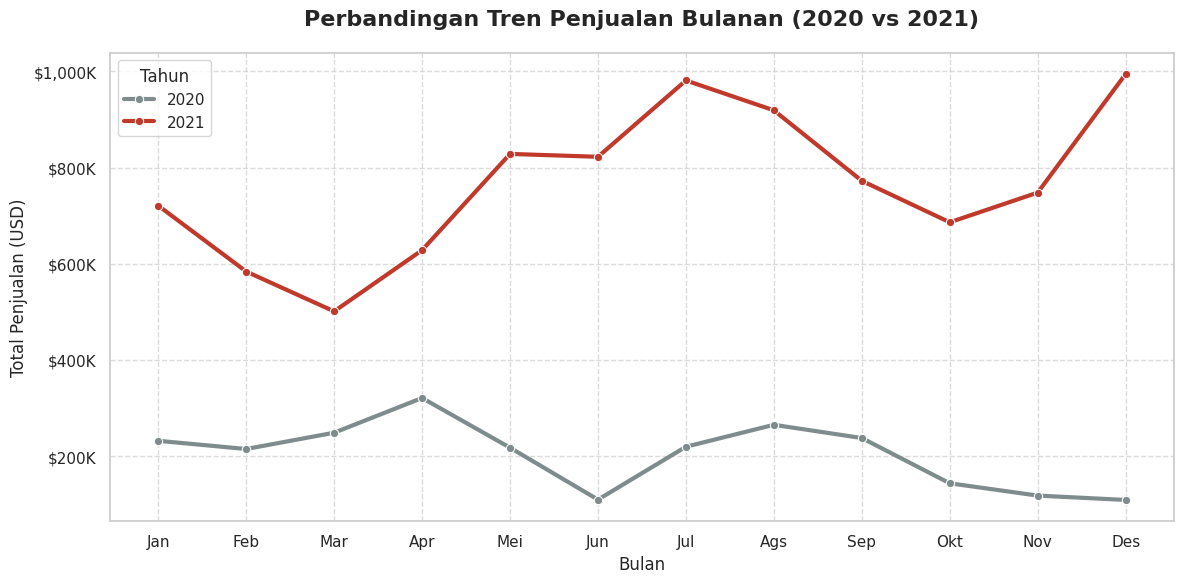

In [ ]:
# [CODE VISUALISASI 1]
# Langkah 1: Agregasi data total penjualan per Tahun dan Bulan
monthly_sales = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Langkah 2: Membuat Line Chart
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=monthly_sales, x='Month', y='Total Sales', hue='Year',
                   palette=['#7f8c8d', '#c0392b'], marker='o', linewidth=3)

# Kustomisasi Grafik
plt.title('Perbandingan Tren Penjualan Bulanan (2020 vs 2021)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penjualan (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun',
                                       'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])
# Format sumbu Y menjadi mata uang Dollar ($) agar lebih profesional
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x/1000)))
plt.legend(title='Tahun', title_fontsize=12)
plt.grid(True, which='major', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretasi Grafik 1:**
* *(Silakan isi bagian ini berdasarkan grafik yang muncul. Contoh kalimat: "Dapat dilihat bahwa tren penjualan pada tahun 2021 cenderung lebih stabil dan tinggi dibandingkan tahun 2020. Lonjakan penjualan terlihat signifikan pada pertengahan tahun...")*

---

### **2. Analisis Produk Terlaris (Top 5 Products)**
Visualisasi kedua bertujuan mengidentifikasi produk unggulan menggunakan *Bar Chart*. Kita akan mengurutkan produk berdasarkan total pendapatan yang dihasilkan.

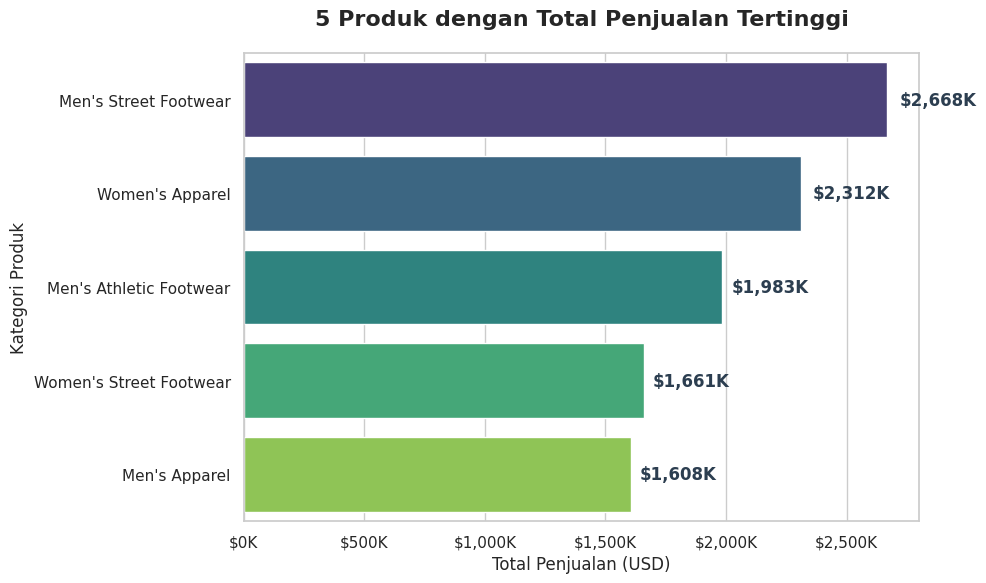

In [ ]:
# [CODE VISUALISASI 2]
# Langkah 1: Kelompokkan data berdasarkan Produk, jumlahkan Total Sales, lalu ambil 5 teratas
top5_products = df.groupby('Product')['Total Sales'].sum().nlargest(5).reset_index()
top5_products = top5_products.sort_values('Total Sales', ascending=False) # Urutkan dari terbesar

# Langkah 2: Membuat Bar Chart Horizontal
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(data=top5_products, y='Product', x='Total Sales', palette='viridis')

# Kustomisasi Grafik
plt.title('5 Produk dengan Total Penjualan Tertinggi', fontsize=16, weight='bold', pad=20)
plt.xlabel('Total Penjualan (USD)', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x/1000)))

# Menambahkan label nilai aktual di ujung setiap batang agar informatif
for i, v in enumerate(top5_products['Total Sales']):
    ax2.text(v + (v*0.02), i, f'${v/1000:,.0f}K', va='center', fontweight='bold', color='#2c3e50')

plt.tight_layout()
plt.show()

**Interpretasi Grafik 2:**
* *(Silakan isi interpretasi. Contoh: "Berdasarkan grafik di atas, produk 'Men's Street Footwear' menduduki peringkat pertama sebagai penyumbang pendapatan terbesar. Hal ini mengindikasikan tingginya minat konsumen pria terhadap produk alas kaki kasual.")*

---

### **3. Analisis Kontribusi Wilayah (Regional Sales Share)**
Untuk melihat sebaran pasar, kita menggunakan *Donut Chart* yang menunjukkan persentase kontribusi setiap wilayah terhadap total penjualan nasional.

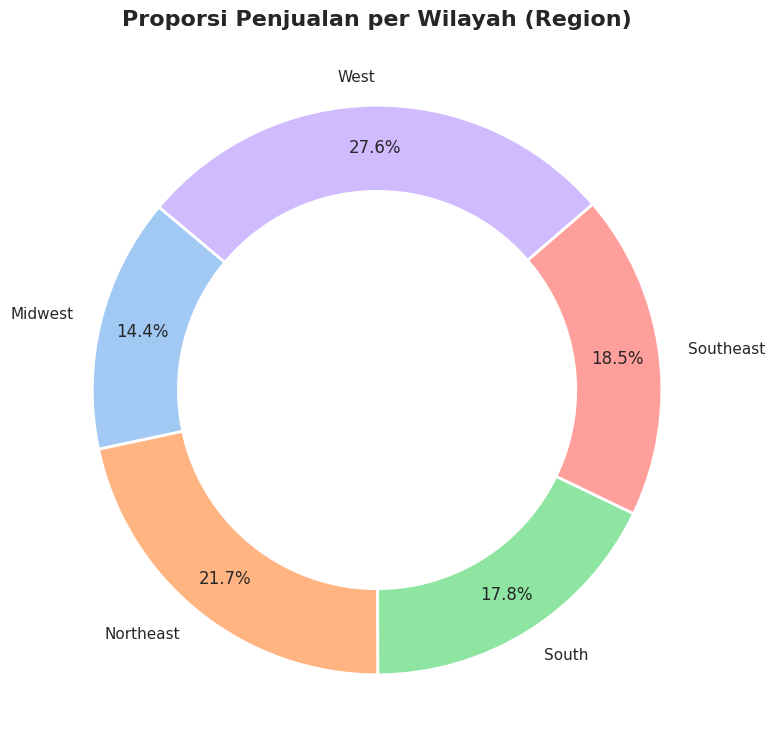

In [ ]:
# [CODE VISUALISASI 3]
# Langkah 1: Agregasi total penjualan per Wilayah
region_share = df.groupby('Region')['Total Sales'].sum().reset_index()

# Langkah 2: Membuat Donut Chart
plt.figure(figsize=(8, 8))
# Menggunakan palet warna pastel agar nyaman dilihat
colors = sns.color_palette('pastel')[0:len(region_share)]
plt.pie(region_share['Total Sales'], labels=region_share['Region'], autopct='%1.1f%%',
        startangle=140, colors=colors, pctdistance=0.85,
        wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2))

# Menambahkan lingkaran putih di tengah untuk efek 'Donut'
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proporsi Penjualan per Wilayah (Region)', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

**Interpretasi Grafik 3:**
* *(Silakan isi interpretasi. Contoh: "Wilayah 'West' dan 'Northeast' memberikan kontribusi terbesar, masing-masing sekitar 20%+. Ini menunjukkan perlunya mempertahankan strategi pemasaran yang agresif di kedua wilayah kunci tersebut.")*

---

### **4. Analisis Korelasi: Harga vs. Unit Terjual**
Visualisasi terakhir menggunakan *Scatter Plot* untuk menguji hipotesis ekonomi dasar: apakah harga yang lebih tinggi menyebabkan penurunan jumlah unit yang diminta (terjual)?

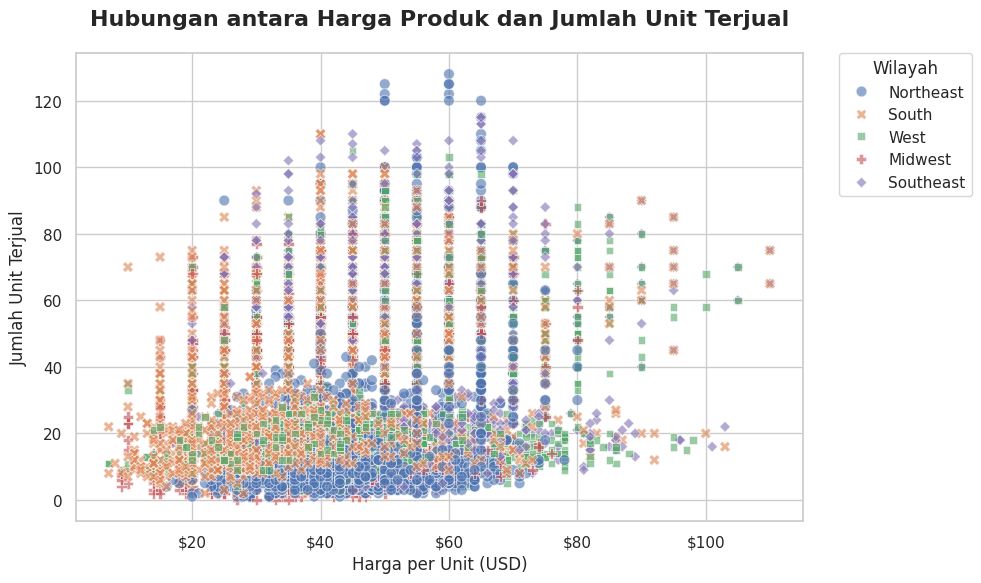

In [ ]:
# [CODE VISUALISASI 4]
plt.figure(figsize=(10, 6))
# Scatter plot dengan transparansi (alpha) untuk mengatasi overplotting jika data banyak
ax4 = sns.scatterplot(data=df, x='Price per Unit', y='Units Sold',
                      hue='Region', style='Region', s=60, alpha=0.6, palette='deep')

plt.title('Hubungan antara Harga Produk dan Jumlah Unit Terjual', fontsize=16, weight='bold', pad=20)
plt.xlabel('Harga per Unit (USD)', fontsize=12)
plt.ylabel('Jumlah Unit Terjual', fontsize=12)
ax4.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Meletakkan legenda di luar area grafik agar tidak menutupi data
plt.legend(title='Wilayah', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

**Interpretasi Grafik 4:**
* *(Silakan isi interpretasi. Contoh: "Grafik scatter plot menunjukkan pola penyebaran yang acak. Tidak terlihat korelasi negatif yang kuat antara harga dan unit terjual. Artinya, dalam rentang harga ini, konsumen Nike cenderung tetap membeli produk meskipun harganya bervariasi (permintaan inelastis).")*

### **5. Analisis Penjualan per Negara Bagian (Sales by State)**
Visualisasi terakhir ini akan menampilkan total penjualan yang dihasilkan oleh setiap negara bagian di Amerika Serikat, menggunakan *Bar Chart* untuk melihat distribusi penjualan secara geografis yang lebih rinci.

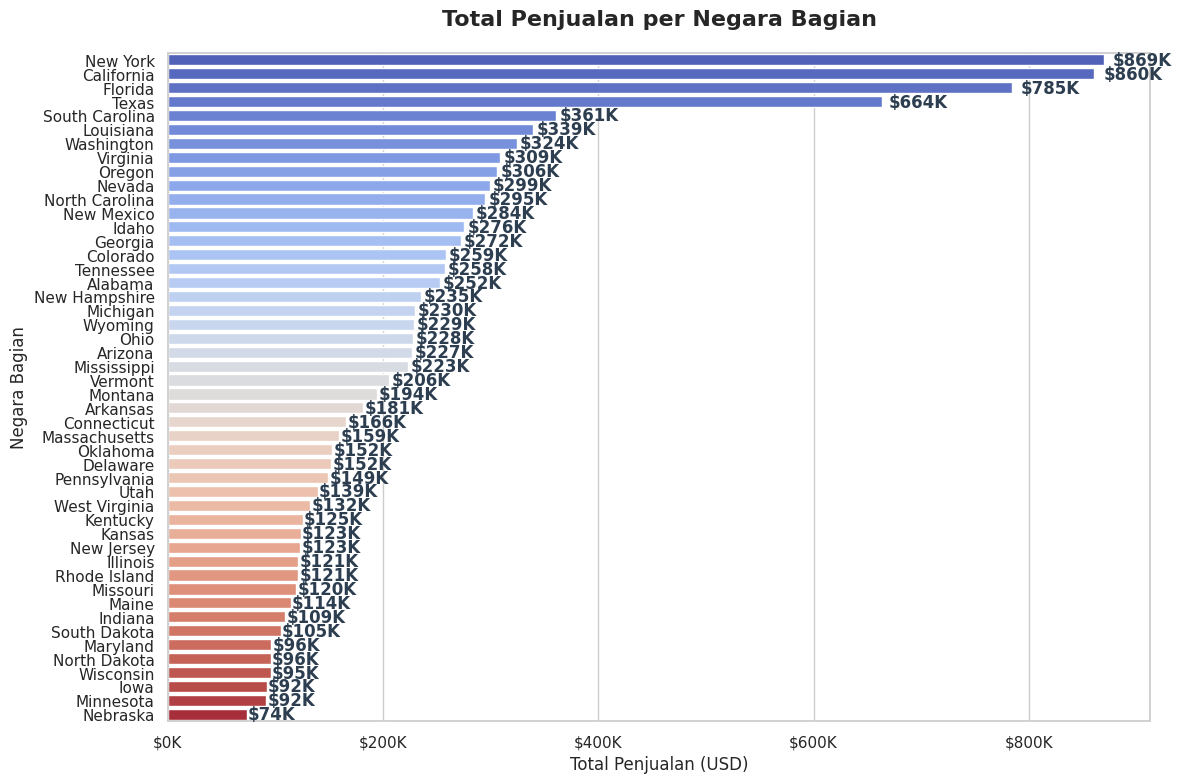

In [ ]:
# [CODE VISUALISASI 5]
# Langkah 1: Agregasi total penjualan per Negara Bagian
state_sales = df.groupby('State')['Total Sales'].sum().reset_index()

# Urutkan dari penjualan tertinggi ke terendah
state_sales = state_sales.sort_values('Total Sales', ascending=False)

# Langkah 2: Membuat Bar Chart Horizontal
plt.figure(figsize=(12, 8))
ax5 = sns.barplot(data=state_sales, y='State', x='Total Sales', palette='coolwarm')

# Kustomisasi Grafik
plt.title('Total Penjualan per Negara Bagian', fontsize=16, weight='bold', pad=20)
plt.xlabel('Total Penjualan (USD)', fontsize=12)
plt.ylabel('Negara Bagian', fontsize=12)
ax5.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x/1000)))

# Menambahkan label nilai aktual di ujung setiap batang
for i, v in enumerate(state_sales['Total Sales']):
    ax5.text(v + (v*0.01), i, f'${v/1000:,.0f}K', va='center', fontweight='bold', color='#2c3e50')

plt.tight_layout()
plt.show()

**Interpretasi Grafik 5:**
* *(Silakan isi interpretasi Anda di sini. Contoh: "Negara bagian seperti New York dan California menunjukkan kontribusi penjualan yang signifikan, mengindikasikan bahwa upaya pemasaran dan distribusi harus tetap difokuskan pada wilayah-wilayah padat penduduk ini.")*

### **6. Analisis Penjualan dengan Filter Dinamis (per Wilayah)**

In [ ]:
selected_region = 'West'
df_filtered_region = df[df['Region'] == selected_region]

monthly_sales_filtered_region = df_filtered_region.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

print(f"Contoh data penjualan bulanan untuk wilayah {selected_region}:")
monthly_sales_filtered_region.head()

Contoh data penjualan bulanan untuk wilayah West:


,Year,Month,Total Sales
0,2020,1,81037
1,2020,2,142813
2,2020,3,101115
3,2020,4,123810
4,2020,5,113622


from matplotlib import pyplot as plt
_df_0['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total Sales'].plot(kind='hist', bins=20, title='Total Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Month', y='Total Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Total Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Total Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Total Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Month'}, axis=1)
              .sort_values('Month', ascending=True))
  xs = counted['Month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Total Sales'].plot(kind='line', figsize=(8, 4), title='Total Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

## **V. KESIMPULAN**

Berdasarkan serangkaian visualisasi yang telah dilakukan terhadap data penjualan Nike, dapat disimpulkan beberapa poin penting:

1.  **Tren Waktu:** Tahun 2021 menunjukkan performa yang lebih baik/stabil dibandingkan 2020.
2.  **Produk Unggulan:** Fokus penjualan terbesar terletak pada kategori alas kaki pria (*Men's Footwear*).
3.  **Pasar Utama:** Wilayah [Sebutkan wilayah terbesar dari grafik pie] merupakan pasar paling dominan di AS.
4.  **Perilaku Konsumen:** Harga produk (dalam rentang yang ada saat ini) tidak menjadi faktor tunggal yang menurunkan minat beli konsumen secara signifikan.

Visualisasi ini membantu manajemen untuk mengalokasikan stok lebih banyak ke wilayah dengan permintaan tinggi dan mempertahankan strategi harga yang ada saat ini.